In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Load Train_transaction file
tr_tran = pd.read_csv("dataset/train_transaction.csv", index_col="TransactionID")

In [4]:
# Load Train_identity file
tr_iden = pd.read_csv("dataset/train_identity.csv", index_col = "TransactionID")

In [8]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [9]:
# Merge data by TransactionID
tr = pd.concat([tr_iden, tr_tran], axis=1, sort=False, join='outer')

# V101~ 분석

# 차원축소 (PCA) 위한 데이터 가공
    - NaN 있으면 PCA ㄴㄴ

## NaN있는 애들  분석법
- null과 not null로 만들어주기
- null이 아닌 애들만 상관관계 보기
    
## 결론
- notnull과 null 로 분리
    - V101~340에서 
    - V138~278 은 169V로 하나로 축소 가능 (COR=0.13), 나머지 의미 x
    
- notnull인 것만 보기
    - 0.30에 가까운 상관관계도 있음. 근데 NAN있는 상태에서 이용 불가
    - nan에 평균을 넣어주면 상관관계가 떨어지긴 해도 유의미함이 유지됨 (0.3->0.2)
    - imputation => 안 쓰는게 좋을 듯
    - median으로 바꾸기

In [173]:
# computes the cofficient of a given column. null = 0 notnull = 1

is_f = tr['isFraud']

for i in range(101,340):
    v = 'V' + str(i)
    c1 = tr[v]
    c1[c1.notnull()]=1
    c1 = c1.fillna(0)
    value = np.corrcoef(is_f, c1)[0,1]
    if abs(value) > 0.05:
        print('V' + str(i), value)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


V167 0.13345519635103162
V168 0.13345519635103162
V169 0.133922680261223
V170 0.133922680261223
V171 0.133922680261223
V172 0.13345519635103162
V173 0.13345519635103162
V174 0.133922680261223
V175 0.133922680261223
V176 0.13345519635103162
V177 0.13345519635103162
V178 0.13345519635103162
V179 0.13345519635103162
V180 0.133922680261223
V181 0.13345519635103162
V182 0.13345519635103162
V183 0.13345519635103162
V184 0.133922680261223
V185 0.133922680261223
V186 0.13345519635103162
V187 0.13345519635103162
V188 0.133922680261223
V189 0.133922680261223
V190 0.13345519635103162
V191 0.13345519635103162
V192 0.13345519635103162
V193 0.13345519635103162
V194 0.133922680261223
V195 0.133922680261223
V196 0.13345519635103162
V197 0.133922680261223
V198 0.133922680261223
V199 0.13345519635103162
V200 0.133922680261223
V201 0.133922680261223
V202 0.13345519635103162
V203 0.13345519635103162
V204 0.13345519635103162
V205 0.13345519635103162
V206 0.13345519635103162
V207 0.13345519635103162
V208 0.

In [106]:
# computes the cofficient of a given column. compute only notnull.

is_f = tr['isFraud']

for i in range(101,340):
    v = 'V' + str(i)
    c1 = tr[v].copy()
    c1 = c1[tr[v].notnull()]
    is_f_new = is_f[tr[v].notnull()]
    value = np.corrcoef(is_f_new, c1)[0,1]
    if abs(value) > 0.05:
        print('V' + str(i), value)

In [101]:
# computes the cofficient of a given column. null = mean

is_f = tr['isFraud']

for i in range(101,340):
    v = 'V' + str(i)
    c1 = tr[v].copy()
    c1 = c1.fillna(c1.mean())
    value = np.corrcoef(is_f, c1)[0,1]
    if abs(value) > 0.05:
        print('V' + str(i), value)

V101 -0.004710196061015617
V102 -0.004845652827305296
V103 -0.005118639030202433
V104 0.003483305681980538
V105 -0.0032279738257674244
V106 -0.002090345323241072
V107 0.0025525153461444005
V108 0.09675505848193262
V109 0.06096922704100673
V110 0.08159658397158054
V111 0.12156016639856457
V112 0.1051693657746929
V113 0.11592872085092594
V114 0.0960469726207923
V115 0.057085011649709014
V116 0.08061102351449526
V117 0.04941847764882912
V118 0.04058487969827598
V119 0.048114964912675376
V120 0.019670128071480848
V121 0.012324522850513437
V122 0.018704446564182915
V123 0.13816551303444657
V124 0.07669005818364508
V125 0.11195352871838662
V126 -0.0035441330307614577
V127 -0.0026275754596275713
V128 -0.0019294693604923333
V129 0.012725417373588318
V130 0.0030747281575854786
V131 0.024964533271429955
V132 -0.004261382970922181
V133 -0.0031640266366469625
V134 -0.0035104753958055154
V135 -0.00027615108778164716
V136 -4.223465435743009e-05
V137 -0.00011475295551019447
V138 0.01783993709330374
V

In [102]:
is_f = tr['isFraud']

for i in range(101,340):
    v = 'V' + str(i)
    c1 = tr[v].copy()
    c1 = c1.fillna(c1.median())
    value = np.corrcoef(is_f, c1)[0,1]
    if abs(value) > 0.05:
        print('V' + str(i), value)

V101 -0.004712588435973312
V102 -0.004848468422183151
V103 -0.005121396278808517
V104 0.003475990011045623
V105 -0.0032325865762303117
V106 -0.0020953376564891136
V107 0.0025536514765998673
V108 0.0967518240211528
V109 0.06096258156367234
V110 0.08159203738943144
V111 0.1215581180697384
V112 0.10516574563928015
V113 0.11592614896671365
V114 0.09604211313092191
V115 0.057075123334705075
V116 0.08060436170899399
V117 0.04941786041646074
V118 0.04058287359000152
V119 0.04811385017175336
V120 0.019668963274571998
V121 0.012320976925456154
V122 0.018702435832418617
V123 0.1381572684853973
V124 0.07667502378422136
V125 0.11194258554240204
V126 -0.0035471998680636383
V127 -0.0026319728379453067
V128 -0.0019332249929688667
V129 0.012721127485033377
V130 0.003058490572729484
V131 0.02495357804191732
V132 -0.004263912497447949
V133 -0.0031670156651259973
V134 -0.003513390586774012
V135 -0.0002794047006691357
V136 -4.6997164395642835e-05
V137 -0.00011894809063298919
V138 0.01942627449322019
V139 

In [141]:
# computes the cofficient of a given column. ori VS mean VS median

is_f = tr['isFraud']
X, y_ori, y_mean, y_median = [], [], [], []

for i in range(101,340):
    v = 'V' + str(i)
    c1 = tr[v].copy()
    c2 = c1[tr[v].notnull()].copy()
    
    # null = 0 notnull = 1
    is_f_new = is_f[tr[v].notnull()]
    value = np.corrcoef(is_f_new, c2)[0,1]
    X.append('V' + str(i))
    y_ori.append(value)
    
    # null = mean
    c3 = c1.fillna(c1.mean()).copy()
    value = np.corrcoef(is_f, c3)[0,1]
    y_mean.append(value)
    
    #null =median
    c4 = c1.fillna(c1.median()).copy()
    value = np.corrcoef(is_f, c4)[0,1]
    y_median.append(value)

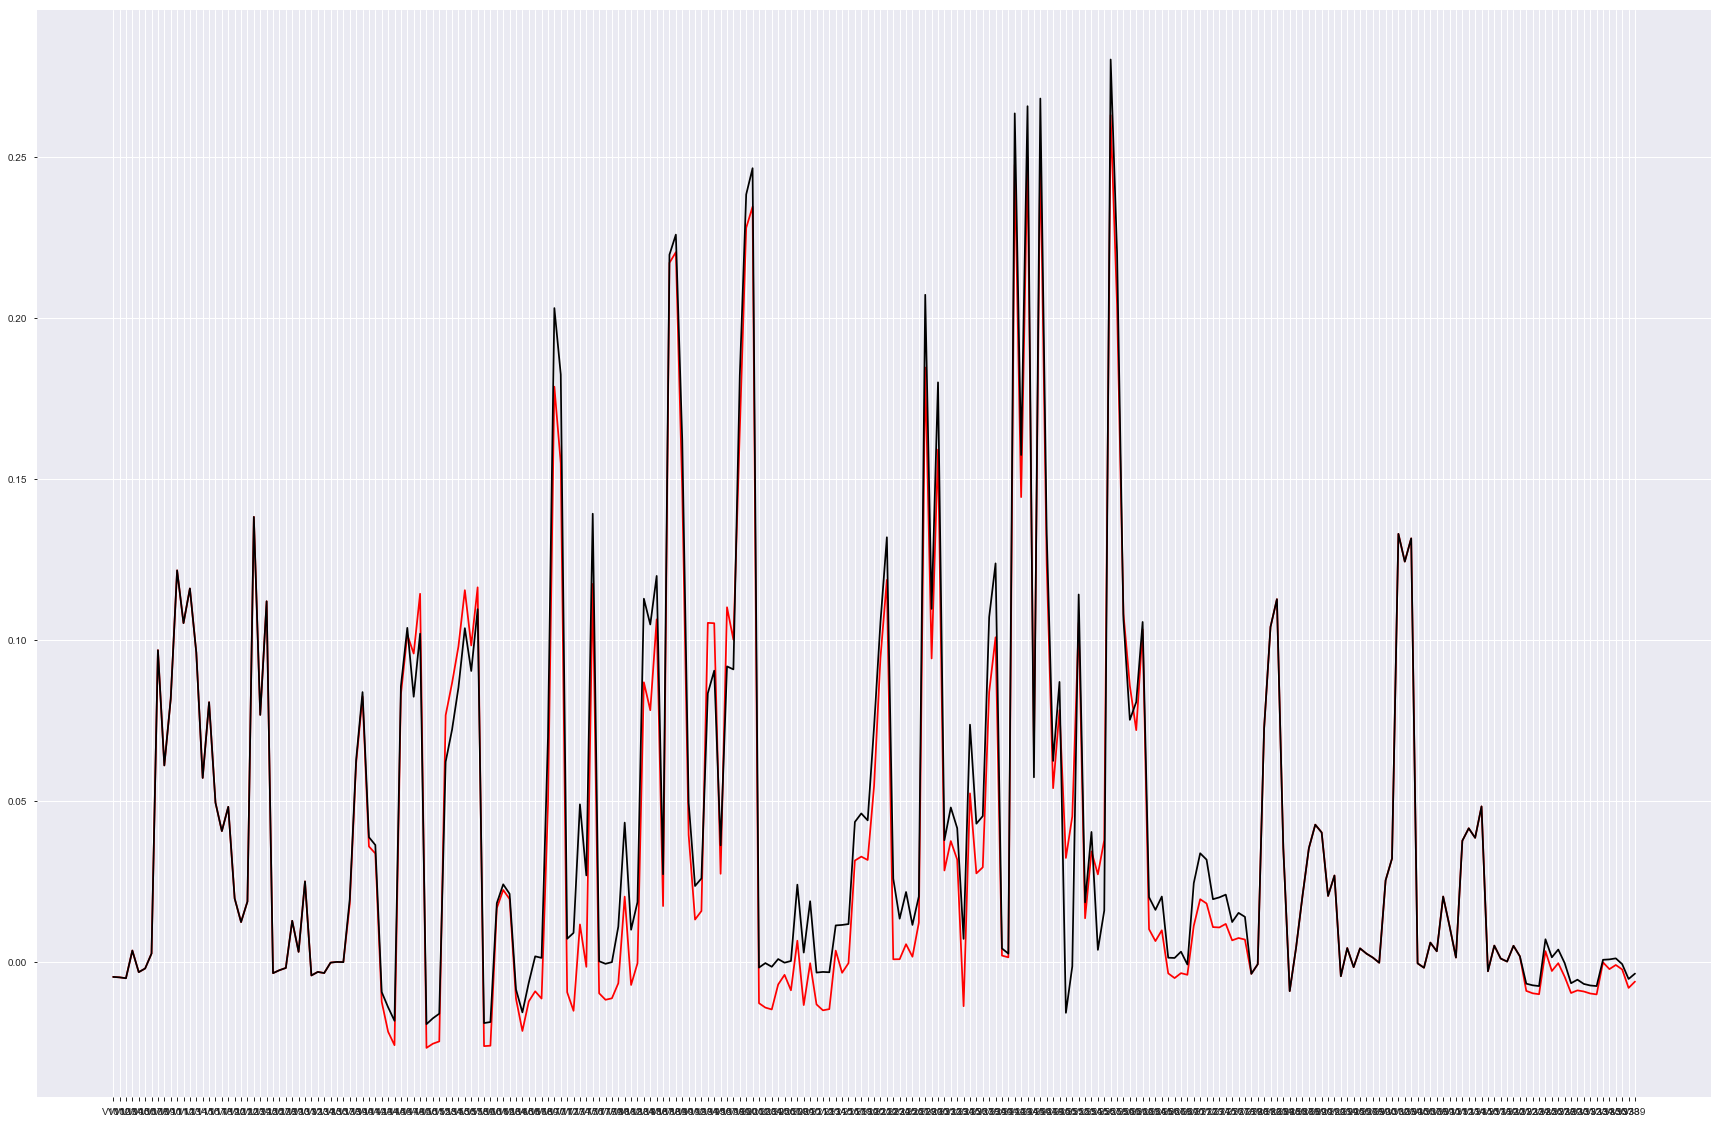

In [157]:
#plotting t, a separately
plt.figure(figsize=((30,20)))
plt.plot(X, y_mean, 'r')
plt.plot(X, y_median, 'black')
plt.show()

# PCA 적용
- 일단 먼저 nan을 median으로 대체해줌

In [11]:
tr_new = pd.DataFrame()

for i in range(101,340):
    v = 'V' + str(i)
    c1 = tr[v].copy()
    c1 = c1.fillna(c1.median())
    tr_new = pd.concat([tr_new, c1], axis=1, sort=False, join='outer')

In [ ]:
tr_new

In [12]:
pca = PCA(n_components = 2) 
X2D = pca.fit_transform(tr_new)

In [17]:
V101_339 = X2D
V101_339

array([[-6601.8668403 ,  -771.67960787],
       [-6601.68337861,  -899.88538988],
       [-6601.68337861,  -899.88538988],
       ...,
       [-6601.68337861,  -899.88538988],
       [-6605.15049718,  1151.04563704],
       [-6602.24892512,  -517.83671471]])

In [13]:
c1 = tr['V169'].copy()
c1[c1.notnull()]=1
list(c1.fillna(0))

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [16]:
# Merge data by TransactionID
V101_339 = pd.DataFrame.append(V101_339, c1, ignore_index=True)
V101_339

MemoryError: 